# Market Trends During The Covid Pandemic Within Australia

This analysis will cover how different industry sectors within Australia have grown or shrunk during the course of the Covid pandemic. By analysing different trends in market growth, by using data provided by the government, interesting comparitive analysis can be done with this data.

Data is provided by the ABS from this link: https://www.abs.gov.au/statistics/industry/retail-and-wholesale-trade/retail-trade-australia/latest-release

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from datetime import timedelta
import requests
import warnings

from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score

import scipy.stats as stats
import copy

### Remove all warnings in Cells

In [2]:
warnings.filterwarnings('ignore')

### Provide a way to use markdown when printing output

In [3]:
from IPython.display import Markdown, display

def printmd(string):
    display(Markdown(string))

### Delete and remove outliers in cells

In [4]:
def outlier_detect(dataset, column):
    for x in [column]: 
        q75,q25 = np.percentile(dataset.loc[:,x],[75,25])
        intr_qr = q75-q25

        max = q75+(1.5*intr_qr)
        min = q25-(1.5*intr_qr)

        dataset.loc[dataset[x] < min,x] = np.nan
        dataset.loc[dataset[x] > max,x] = np.nan  
    return dataset 

### Convert each excel spreadsheet into a readable CSV. Only the `Data1` sheet will be read

In [5]:
turnover_industry_nominal = pd.read_excel('files/850101.xls', sheet_name='Data1')
turnover_industry_nominal.to_csv (r'files\turnover_industry_nominal.csv', index = None, header=True)

In [6]:
turnover_industry_percentage = pd.read_excel('files/850102.xls', sheet_name='Data1')
turnover_industry_percentage.to_csv (r'files\turnover_industry_percentage.csv', index = None, header=True)

In [7]:
turnover_state_nominal = pd.read_excel('files/850103.xls', sheet_name='Data1')
turnover_state_nominal.to_csv (r'files\turnover_state_nominal.csv', index = None, header=True)

In [8]:
turnover_state_percentage = pd.read_excel('files/850104.xls', sheet_name='Data1')
turnover_state_percentage.to_csv (r'files\turnover_state_percentage.csv', index = None, header=True)

In [9]:
turnover_state_subgroup = pd.read_excel('files/8501012.xls', sheet_name='Data1')
turnover_state_subgroup.to_csv (r'files\turnover_state_subgroup.csv', index = None, header=True)

In [10]:
file_names = ["turnover_state_nominal",
"turnover_state_percentage",
"turnover_industry_nominal",
"turnover_industry_percentage",
"turnover_state_subgroup",
"time_series_covid19_confirmed_global"]

In [11]:
TurnoverByState = pd.read_csv(f"files\\{file_names[3]}.csv")
TurnoverByState.head(10)

,Unnamed: 0,% change from preceding month ; Total (State) ; Food retailing ;,% change from preceding month ; Total (State) ; Household goods retailing ;,"% change from preceding month ; Total (State) ; Clothing, footwear and personal accessory retailing ;",% change from preceding month ; Total (State) ; Department stores ;,% change from preceding month ; Total (State) ; Other retailing ;,"% change from preceding month ; Total (State) ; Cafes, restaurants and takeaway food services ;",% change from preceding month ; Total (State) ; Total (Industry) ;,% change from preceding month ; Total (State) ; Food retailing ;.1,% change from preceding month ; Total (State) ; Household goods retailing ;.1,...,% change from preceding month ; Total (State) ; Other retailing ;.1,"% change from preceding month ; Total (State) ; Cafes, restaurants and takeaway food services ;.1",% change from preceding month ; Total (State) ; Total (Industry) ;.1,% change from preceding month ; Total (State) ; Food retailing ;.2,% change from preceding month ; Total (State) ; Household goods retailing ;.2,"% change from preceding month ; Total (State) ; Clothing, footwear and personal accessory retailing ;.2",% change from preceding month ; Total (State) ; Department stores ;.2,% change from preceding month ; Total (State) ; Other retailing ;.2,"% change from preceding month ; Total (State) ; Cafes, restaurants and takeaway food services ;.2",% change from preceding month ; Total (State) ; Total (Industry) ;.2
0,Unit,Percent,Percent,Percent,Percent,Percent,Percent,Percent,Percent,Percent,...,Percent,Percent,Percent,Percent,Percent,Percent,Percent,Percent,Percent,Percent
1,Series Type,Original,Original,Original,Original,Original,Original,Original,Seasonally Adjusted,Seasonally Adjusted,...,Seasonally Adjusted,Seasonally Adjusted,Seasonally Adjusted,Trend,Trend,Trend,Trend,Trend,Trend,Trend
2,Data Type,PERCENT,PERCENT,PERCENT,PERCENT,PERCENT,PERCENT,PERCENT,PERCENT,PERCENT,...,PERCENT,PERCENT,PERCENT,PERCENT,PERCENT,PERCENT,PERCENT,PERCENT,PERCENT,PERCENT
3,Frequency,Month,Month,Month,Month,Month,Month,Month,Month,Month,...,Month,Month,Month,Month,Month,Month,Month,Month,Month,Month
4,Collection Month,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
5,Series Start,1982-04-01 00:00:00,1982-04-01 00:00:00,1982-04-01 00:00:00,1982-04-01 00:00:00,1982-04-01 00:00:00,1982-04-01 00:00:00,1982-04-01 00:00:00,1982-04-01 00:00:00,1982-04-01 00:00:00,...,1982-04-01 00:00:00,1982-04-01 00:00:00,1982-04-01 00:00:00,1982-04-01 00:00:00,1982-04-01 00:00:00,1982-04-01 00:00:00,1982-04-01 00:00:00,1982-04-01 00:00:00,1982-04-01 00:00:00,1982-04-01 00:00:00
6,Series End,2021-07-01 00:00:00,2021-07-01 00:00:00,2021-07-01 00:00:00,2021-07-01 00:00:00,2021-07-01 00:00:00,2021-07-01 00:00:00,2021-07-01 00:00:00,2021-07-01 00:00:00,2021-07-01 00:00:00,...,2021-07-01 00:00:00,2021-07-01 00:00:00,2021-07-01 00:00:00,2021-07-01 00:00:00,2021-07-01 00:00:00,2021-07-01 00:00:00,2021-07-01 00:00:00,2021-07-01 00:00:00,2021-07-01 00:00:00,2021-07-01 00:00:00
7,No. Obs,472,472,472,472,472,472,472,472,472,...,472,472,472,472,472,472,472,472,472,472
8,Series ID,A3348592L,A3348601C,A3348610F,A3348619A,A3348628C,A3348637F,A3348583K,A3348595V,A3348604K,...,A3348631T,A3348640V,A3348586T,A3348598A,A3348607T,A3348616V,A3348625W,A3348634X,A3348643A,A3348589X
9,1982-04-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Make the column names shorter and easier to understand

In [12]:
states = {'New South Wales':'NSW', 'Victoria':'VIC', 'Queensland':'QLD', 'South Australia':'SA', 'Western Australia':'WA', 'Tasmania':'TAS', 'Northern Territory':'NT', 'Australian Capital Territory':'ACT', 'Total (State)':'Total'}
for i,f in enumerate(file_names[0:4]):
    file_name = f
    data = pd.read_csv(f"files\\{file_name}.csv")
    data.index = data['Unnamed: 0']
    data = data.drop(['Unnamed: 0'], axis = 1)
        
    updated_cols = []  
    cols = list(data.columns)
    for c in cols:
        if i in [0,1]:
            updated_cols.append(states[(c.split(';')[1]).strip()])
        else:
            updated_cols.append((c.split(';')[2]).strip())
    data.columns = updated_cols                           ## clean up the columns names
    series_types = list(set(data.loc['Series Type']))     ## seperate the series types
    data = data.T
    temp_index = []
    for type_ in series_types:                            ## loop by series type to split the datasets
        temp = data[data['Series Type'] == type_].T
        temp = temp.drop(list(temp.index)[0:9],axis=0)
        temp = temp.dropna(axis = 0)
        temp = temp.apply(pd.to_numeric, axis = 1)       ## datatype changed to numeric
        table_name = file_name.replace('turnover_','') + '_'+type_.replace('Seasonally ','').lower()
        print(table_name)
        temp.index.name = type_
        exec(f"{table_name} = temp.copy()")    ## use the exec command to generate the instance variables of daataframes

state_nominal_adjusted
state_nominal_trend
state_nominal_original
state_percentage_adjusted
state_percentage_trend
state_percentage_original
industry_nominal_adjusted
industry_nominal_trend
industry_nominal_original
industry_percentage_adjusted
industry_percentage_trend
industry_percentage_original


In [13]:
data_tables = [state_nominal_trend,
state_nominal_adjusted,
state_nominal_original,
state_percentage_trend,
state_percentage_adjusted,
state_percentage_original,
industry_nominal_trend,
industry_nominal_adjusted,
industry_nominal_original,
industry_percentage_trend,
industry_percentage_adjusted,
industry_percentage_original]

for i, temp in enumerate(data_tables):
    temp_index = []
    for idx in temp.index:
        temp_index.append(datetime.fromisoformat(idx))
    temp.index = temp_index

In [14]:
states = {'New South Wales':'NSW', 'Victoria':'VIC', 'Queensland':'QLD', 'South Australia':'SA', \
          'Western Australia':'WA', 'Tasmania':'TAS', 'Northern Territory':'NT', 'Australian Capital Territory':'ACT', 'Total (State)':'Australia'}

data = turnover_state_subgroup

data.index = data['Unnamed: 0']
data = data.drop(['Unnamed: 0'], axis = 1)
updated_cols = []  
tables = []
cols = list(data.columns)
for c in cols:
    segment = (c.split(';'))
    updated_cols.append( segment[2].strip())
    if not (segment[1].strip() in tables):
        tables.append( segment[1].strip() )
for i,t in enumerate(tables):
    tables[i]=states[t]
data.columns = updated_cols   
list_ = [i for i in range(0,len(list(data.columns))+1, len(set(data.columns)))]
for i in range(len(list_)-1):
    temp = data.T.iloc[list_[i]:list_[i+1]]
    temp= temp.T
    temp = temp.drop(list(temp.index)[0:9],axis=0)
    temp = temp.dropna(axis = 0)
    temp.index.name = tables[i]
    temp = temp.apply(pd.to_numeric, axis = 1)       ## datatype changed to numeric
    table_name = f'turnover_subgroup_{tables[i]}'
    print(table_name)
    exec(f"{table_name} = temp.copy()")    ## use the exec command to generate the instance variables of daataframes


turnover_subgroup_NSW
turnover_subgroup_VIC
turnover_subgroup_QLD
turnover_subgroup_SA
turnover_subgroup_WA
turnover_subgroup_TAS
turnover_subgroup_NT
turnover_subgroup_ACT
turnover_subgroup_Australia


### A dataframe containing the Covid cases per state

This dataset is updated daily and fetched for the most recent cases. Data set is provided by CSSEGIS and Data: https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_time_series

In [15]:
feed = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
file = "time_series_covid19_confirmed_global.csv"
try:
    r = requests.get(feed)
    try:
        os.remove('files/'+file)
    except Exception:
        pass
    open('files/'+file, 'wb').write(r.content)
    printmd('**Updated Daily Covid Data:** '+file)
except Exception as e:
    print(e)

**Updated Daily Covid Data:** time_series_covid19_confirmed_global.csv

In [16]:
covid_data = pd.read_csv(f"files\\{file_names[5]}.csv")
covid_data = covid_data[ covid_data["Country/Region"] == "Australia"]
covid_data = covid_data.drop(["Lat", "Long","Country/Region", "Province/State"], axis = 1)
States = ['ACT','NSW','NT','QLD','SA','TAS','VIC','WA']
covid_data.index = States

## by here the unecessary rows have been removed

to_del = []
not_del = []
dates = list(covid_data.columns)
for i in range(len(dates)):
    dates[i] = dates[i].split('/')
    for j in range(len(dates[i])):
        dates[i][j] =int(dates[i][j])
        
for i in range(len(dates)-1):
    if dates[i+1][0] == dates[i][0]+1:
        pass
    elif ((dates[i][0] == 12) and(dates[i+1][0] == 1)):
        pass
    else:
        to_del.append(dates[i])
temp_list=list()
for td in to_del:
    temp_list.append(f"{td[0]}/{td[1]}/{td[2]}")
to_del = temp_list  ## here i make a list of the collumns to drop

covid_data = covid_data.drop(to_del, axis = 1) ## collumns dropped
covid_cases_agr = covid_data.T
total = []
arr = covid_cases_agr.to_numpy()
for i in range(np.shape(arr)[0]):
    total.append(arr[i].sum())
covid_cases_agr['Total'] = total ## adding a column with total cases in australia
## here the df is composed of the the number of agregate covid cases by state by the end of each month

temp_index = []
for idx in covid_cases_agr.index:
    temp_var = idx.split("/")
    dt_obj =  datetime( int("20"+temp_var[2]) , int(temp_var[0]),int(temp_var[1])) +timedelta(days = 1)
    temp_index.append(dt_obj  )                                                               ## by liv
covid_cases_agr.index = temp_index                                                            ## thank you liv
covid_cases_agr

,ACT,NSW,NT,QLD,SA,TAS,VIC,WA,Total
2020-02-01,0,4,0,2,0,0,3,0,9
2020-03-01,0,4,0,9,3,0,7,2,25
2020-04-01,80,2032,17,743,337,69,917,364,4559
2020-05-01,106,3025,28,1033,438,221,1364,551,6766
2020-06-01,107,3098,29,1058,440,228,1653,589,7202
2020-07-01,108,3203,29,1067,443,228,2231,611,7920
2020-08-01,113,3773,33,1084,451,229,10931,666,17280
2020-09-01,113,4063,33,1124,463,230,19138,655,25819
2020-10-01,113,4227,33,1157,468,230,20183,685,27096
2020-11-01,114,4425,38,1172,501,230,20346,769,27595


In [17]:
cols = list(covid_cases_agr.columns)
change_list  = list()
new_cases_dict , change_cases_dict= {},{}
for c in cols:
    temp = list(covid_cases_agr[c])
    dif_list , delta_list = list() , []
    dif_list.append(temp[0])
    
    for i in range(1,len(temp)):
        dif_list.append(temp[i]-temp[i-1])
        
        if dif_list[i-1]==0:
            delta_list.append(dif_list[i])
        else:
            delta_list.append(((dif_list[i]-dif_list[i-1])/dif_list[i-1]))
    
    new_cases_dict[c] = dif_list
    change_cases_dict[c]=delta_list
    
covid_cases_new = pd.DataFrame(new_cases_dict, index = covid_cases_agr.index)
covid_cases_change_new = pd.DataFrame(change_cases_dict, index = covid_cases_agr.index[1:])
covid_cases_new.head()

,ACT,NSW,NT,QLD,SA,TAS,VIC,WA,Total
2020-02-01,0,4,0,2,0,0,3,0,9
2020-03-01,0,0,0,7,3,0,4,2,16
2020-04-01,80,2028,17,734,334,69,910,362,4534
2020-05-01,26,993,11,290,101,152,447,187,2207
2020-06-01,1,73,1,25,2,7,289,38,436


In [18]:
covid_cases_change_new

,ACT,NSW,NT,QLD,SA,TAS,VIC,WA,Total
2020-03-01,0.000000,-1.000000,0.000000,2.500000,3.000000,0.000000,0.333333,2.000000,0.777778
2020-04-01,80.000000,2028.000000,17.000000,103.857143,110.333333,69.000000,226.500000,180.000000,282.375000
2020-05-01,-0.675000,-0.510355,-0.352941,-0.604905,-0.697605,1.202899,-0.508791,-0.483425,-0.513233
2020-06-01,-0.961538,-0.926485,-0.909091,-0.913793,-0.980198,-0.953947,-0.353468,-0.796791,-0.802447
2020-07-01,0.000000,0.438356,-1.000000,-0.640000,0.500000,-1.000000,1.000000,-0.421053,0.646789
2020-08-01,4.000000,4.428571,4.000000,0.888889,1.666667,1.000000,14.051903,1.500000,12.036212
2020-09-01,-1.000000,-0.491228,-1.000000,1.352941,0.500000,0.000000,-0.056667,-1.200000,-0.087714
2020-10-01,0.000000,-0.434483,0.000000,-0.175000,-0.583333,-1.000000,-0.872670,-3.727273,-0.850451
2020-11-01,1.000000,0.207317,5.000000,-0.545455,5.600000,0.000000,-0.844019,1.800000,-0.609240
2020-12-01,2.000000,-0.207071,2.000000,1.000000,0.848485,0.000000,-1.006135,-0.380952,-0.364729


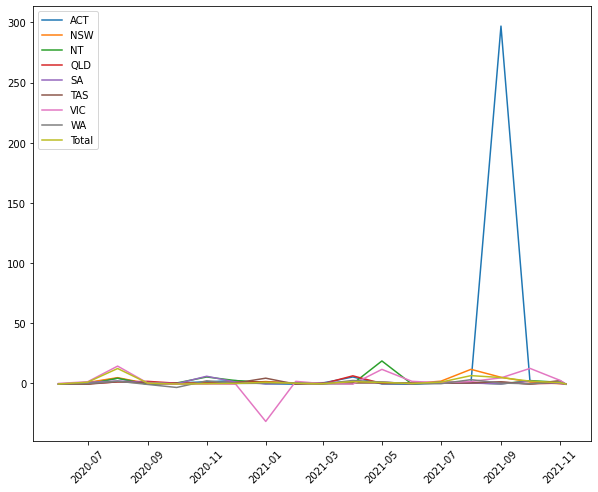

In [19]:
plt.figure(figsize=(10,8))
plt.xticks(rotation=45)
plt.plot(covid_cases_change_new.iloc[3:])
plt.legend(list(covid_cases_change_new.columns), loc=2)
plt.show()

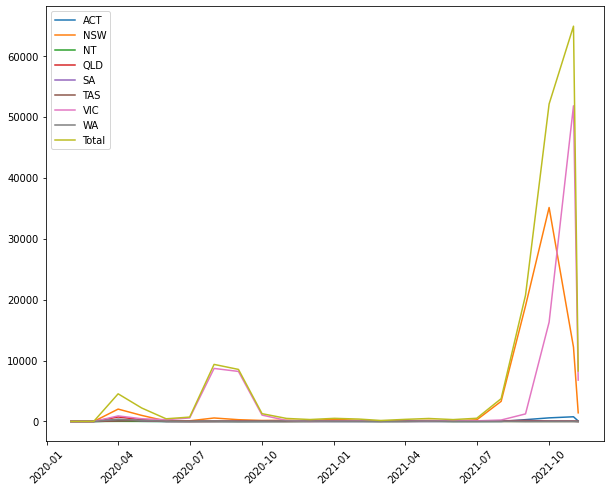

In [20]:
plt.figure(figsize=(10,8))
plt.xticks(rotation=45)
plt.plot(covid_cases_new)
plt.legend(list(covid_cases_new.columns), loc=2)
plt.show()

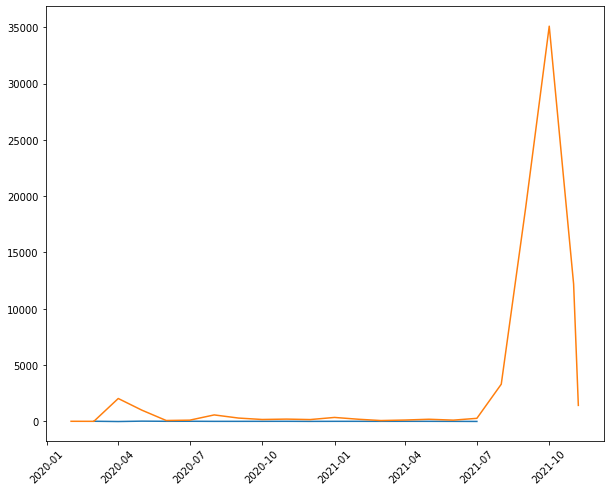

In [21]:
state = 'NSW'
covid_cases = covid_cases_new[state]
covid_cases.name = f'Cases {state}'
covid_cases.name
plt.figure(figsize=[10,8])
plt.xticks(rotation=45)
plt.plot(state_percentage_adjusted[state_percentage_adjusted.index>covid_cases.index[0]][state])
plt.plot(covid_cases, label = covid_cases.name)
plt.show()

### Industry Percentage - Before the Pandemic

In [22]:
industry_percentage_adjusted[-40:-20].describe()

,Food retailing,Household goods retailing,"Clothing, footwear and personal accessory retailing",Department stores,Other retailing,"Cafes, restaurants and takeaway food services",Total (Industry)
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,0.300000,0.125000,0.460000,0.265000,0.270000,0.260000,0.280000
std,0.224781,0.650405,1.498912,1.704259,0.587681,0.768731,0.223842
min,-0.200000,-1.400000,-1.700000,-2.200000,-0.700000,-1.300000,0.000000
25%,0.200000,-0.200000,-0.625000,-0.725000,0.000000,-0.250000,0.175000
50%,0.300000,0.300000,0.150000,-0.250000,0.250000,0.300000,0.200000
75%,0.425000,0.425000,1.725000,0.725000,0.500000,0.850000,0.400000
max,0.800000,1.100000,3.500000,3.900000,1.900000,1.400000,0.900000


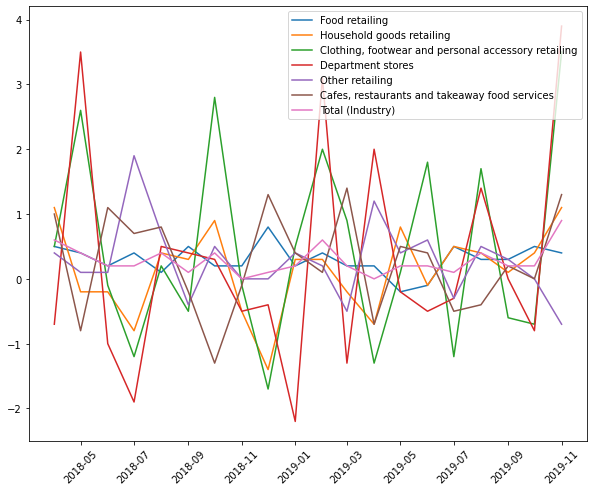

In [23]:
plt.figure(figsize=[10,8])
plt.xticks(rotation=45)
plt.plot(industry_percentage_adjusted[-40:-20])
plt.legend(list(industry_percentage_adjusted.columns), loc=1)

plt.show()

In [24]:
turnover_state_subgroup.head(10)

,Unnamed: 0,Turnover ; New South Wales ; Supermarket and grocery stores ;,Turnover ; New South Wales ; Liquor retailing ;,Turnover ; New South Wales ; Other specialised food retailing ;,Turnover ; New South Wales ; Food retailing ;,"Turnover ; New South Wales ; Furniture, floor coverings, houseware and textile goods retailing ;",Turnover ; New South Wales ; Electrical and electronic goods retailing ;,"Turnover ; New South Wales ; Hardware, building and garden supplies retailing ;",Turnover ; New South Wales ; Household goods retailing ;,Turnover ; New South Wales ; Clothing retailing ;,...,Turnover ; Total (State) ; Department stores ;,Turnover ; Total (State) ; Newspaper and book retailing ;,Turnover ; Total (State) ; Other recreational goods retailing ;,"Turnover ; Total (State) ; Pharmaceutical, cosmetic and toiletry goods retailing ;",Turnover ; Total (State) ; Other retailing n.e.c. ;,Turnover ; Total (State) ; Other retailing ;,"Turnover ; Total (State) ; Cafes, restaurants and catering services ;",Turnover ; Total (State) ; Takeaway food services ;,"Turnover ; Total (State) ; Cafes, restaurants and takeaway food services ;",Turnover ; Total (State) ; Total (Industry) ;
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
Unit,Unit,$ Millions,$ Millions,$ Millions,$ Millions,$ Millions,$ Millions,$ Millions,$ Millions,$ Millions,...,$ Millions,$ Millions,$ Millions,$ Millions,$ Millions,$ Millions,$ Millions,$ Millions,$ Millions,$ Millions
Series Type,Series Type,Seasonally Adjusted,Seasonally Adjusted,Seasonally Adjusted,Seasonally Adjusted,Seasonally Adjusted,Seasonally Adjusted,Seasonally Adjusted,Seasonally Adjusted,Seasonally Adjusted,...,Seasonally Adjusted,Seasonally Adjusted,Seasonally Adjusted,Seasonally Adjusted,Seasonally Adjusted,Seasonally Adjusted,Seasonally Adjusted,Seasonally Adjusted,Seasonally Adjusted,Seasonally Adjusted
Data Type,Data Type,FLOW,FLOW,FLOW,FLOW,FLOW,FLOW,FLOW,FLOW,FLOW,...,FLOW,FLOW,FLOW,FLOW,FLOW,FLOW,FLOW,FLOW,FLOW,FLOW
Frequency,Frequency,Month,Month,Month,Month,Month,Month,Month,Month,Month,...,Month,Month,Month,Month,Month,Month,Month,Month,Month,Month
Collection Month,Collection Month,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Series Start,Series Start,1982-04-01 00:00:00,1982-04-01 00:00:00,1982-04-01 00:00:00,1982-04-01 00:00:00,1982-04-01 00:00:00,1982-04-01 00:00:00,1982-04-01 00:00:00,1982-04-01 00:00:00,1982-04-01 00:00:00,...,1982-04-01 00:00:00,1982-04-01 00:00:00,1982-04-01 00:00:00,1982-04-01 00:00:00,1982-04-01 00:00:00,1982-04-01 00:00:00,1982-04-01 00:00:00,1982-04-01 00:00:00,1982-04-01 00:00:00,1982-04-01 00:00:00
Series End,Series End,2021-07-01 00:00:00,2021-07-01 00:00:00,2021-07-01 00:00:00,2021-07-01 00:00:00,2021-07-01 00:00:00,2021-07-01 00:00:00,2021-07-01 00:00:00,2021-07-01 00:00:00,2021-07-01 00:00:00,...,2021-07-01 00:00:00,2021-07-01 00:00:00,2021-07-01 00:00:00,2021-07-01 00:00:00,2021-07-01 00:00:00,2021-07-01 00:00:00,2021-07-01 00:00:00,2021-07-01 00:00:00,2021-07-01 00:00:00,2021-07-01 00:00:00
No. Obs,No. Obs,472,472,472,472,472,472,472,472,472,...,472,472,472,472,472,472,472,472,472,472
Series ID,Series ID,A3349558A,A3349341L,A3349878L,A3349345W,A3349712L,A3349343T,A3349559C,A3349470J,A3349631K,...,A3349390J,A3349552L,A3349707V,A3349553R,A3349395V,A3349548W,A3349331J,A3349625R,A3349865A,A3349549X


### Industry Percentage - During the Pandemic

In [25]:
industry_percentage_adjusted[-20:].describe()

,Food retailing,Household goods retailing,"Clothing, footwear and personal accessory retailing",Department stores,Other retailing,"Cafes, restaurants and takeaway food services",Total (Industry)
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,0.855000,0.815000,3.425000,-0.065000,0.980000,0.330000,0.515000
std,6.945614,5.716576,34.174796,13.189441,5.864308,14.249399,6.283083
min,-17.100000,-7.800000,-54.000000,-15.200000,-13.800000,-35.400000,-17.400000
25%,-0.600000,-1.525000,-9.125000,-8.550000,-0.550000,-2.175000,-1.275000
50%,0.400000,-0.200000,-1.300000,-2.150000,0.600000,0.900000,0.350000
75%,1.425000,0.975000,5.525000,3.100000,1.750000,4.725000,1.800000
max,23.700000,16.300000,131.400000,43.800000,16.300000,30.500000,16.600000


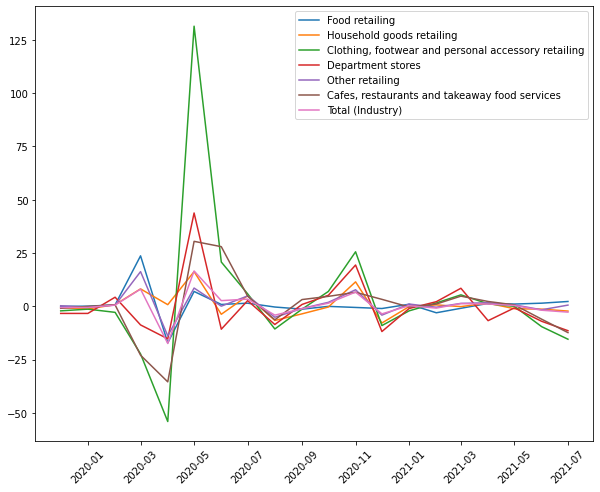

In [26]:
plt.figure(figsize=[10,8])
plt.xticks(rotation=45)
plt.plot(industry_percentage_adjusted[-20:])
plt.legend(list(industry_percentage_adjusted.columns), loc=1)

plt.show()

### Correlation between states before the pandemic

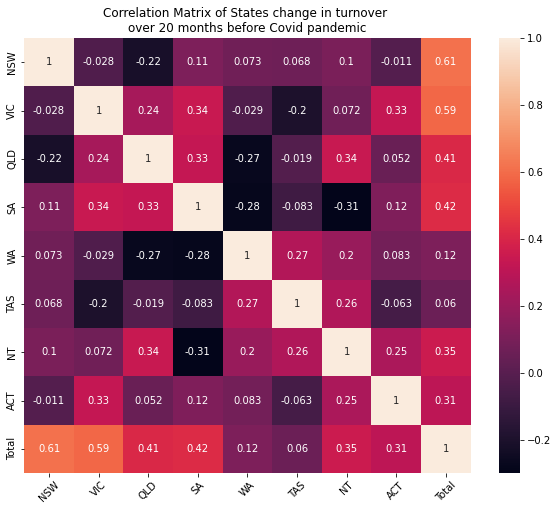

In [27]:
data1 , data2= state_percentage_adjusted[-40:-20], state_percentage_adjusted[-20:]
table1, table2 = data1.T.to_numpy(), data2.T.to_numpy()
cols = list(state_percentage_adjusted.columns)
corr_matrix1 , corr_matrix2 = np.corrcoef(table1), np.corrcoef(table2)


plt.figure(figsize=(10,8))
plt.title('Correlation Matrix of States change in turnover \nover 20 months before Covid pandemic')
sns.heatmap(corr_matrix1, xticklabels = cols, yticklabels = cols, annot=True, vmin=-0.3, vmax=1)

plt.xticks(rotation=45)

plt.show()

### Correlation between states during the pandemic

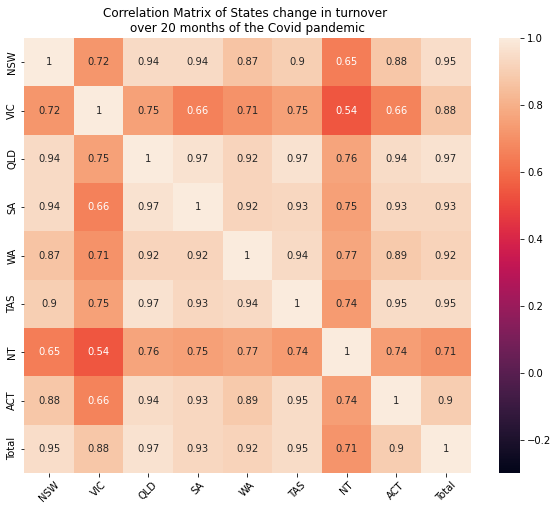

In [28]:
plt.figure(figsize=(10,8))

plt.title('Correlation Matrix of States change in turnover \nover 20 months of the Covid pandemic')
sns.heatmap(corr_matrix2, xticklabels = cols, yticklabels = cols, annot=True, vmin=-0.3, vmax=1)


plt.xticks(rotation=45)

plt.show()

### Correlation of industries before the pandemic

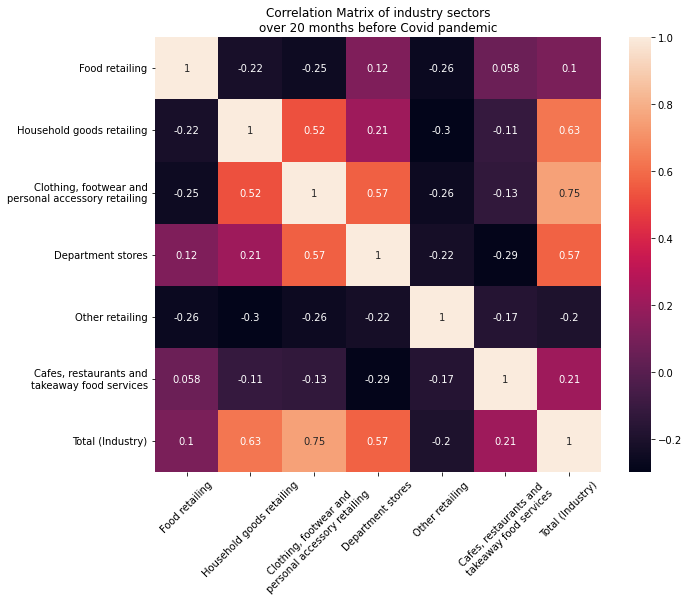

In [29]:
data1 , data2= industry_percentage_adjusted[-40:-20], industry_percentage_adjusted[-20:]
table1, table2 = data1.T.to_numpy(), data2.T.to_numpy()
cols = list(industry_percentage_adjusted.columns)
corr_matrix1 , corr_matrix2 = np.corrcoef(table1), np.corrcoef(table2)
cols[2]= cols[2].replace('and ','and\n')
cols[5]= cols[5].replace('and ','and\n')

plt.figure(figsize=(10,8))
plt.title('Correlation Matrix of industry sectors\nover 20 months before Covid pandemic')
sns.heatmap(corr_matrix1, xticklabels = cols, yticklabels = cols, annot=True, vmin=-0.3, vmax=1)

plt.xticks(rotation=45)

plt.show()

### Correlation of industries during the pandemic

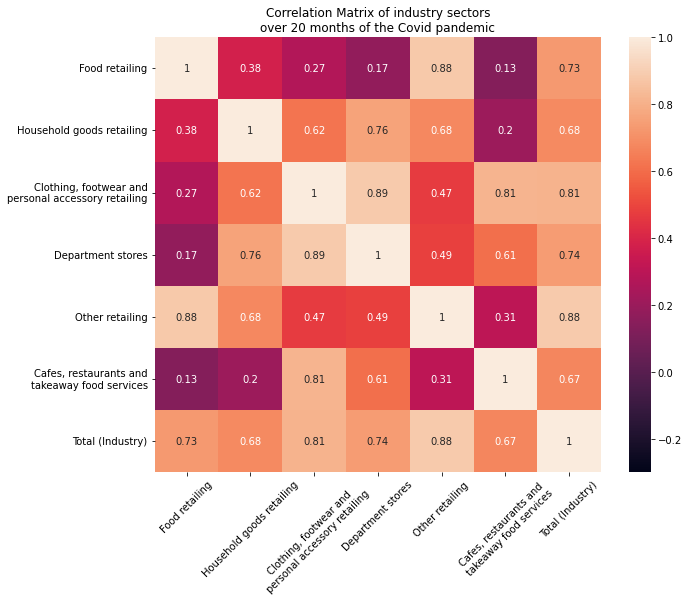

In [30]:
plt.figure(figsize=(10,8))

plt.title('Correlation Matrix of industry sectors\nover 20 months of the Covid pandemic')
sns.heatmap(corr_matrix2, xticklabels = cols, yticklabels = cols, annot=True, vmin=-0.3, vmax=1)

plt.xticks(rotation=45)

plt.show()

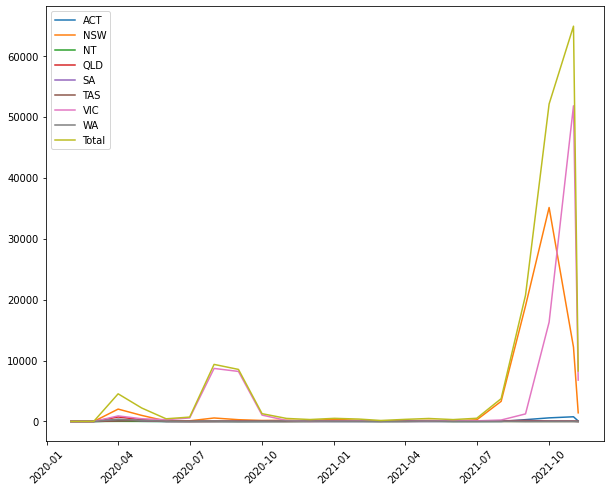

In [31]:
plt.figure(figsize=(10,8))
plt.xticks(rotation=45)
plt.plot(covid_cases_new)
plt.legend(list(covid_cases_new.columns), loc=2)
plt.show()

# Linear Regression Model

In [32]:
data_nominal_adjusted = state_nominal_adjusted
data_nominal_adjusted = data_nominal_adjusted[data_nominal_adjusted.index > datetime(2019,12,1)]
data_nominal_adjusted
covid_agr = covid_cases_new.iloc[covid_cases_new.index < datetime(2021,8,1)]
temp = []
for col in covid_agr.columns:
    temp.append(f"Cases {col}")
covid_agr.columns = temp
result = pd.concat([data_nominal_adjusted, covid_agr], axis=1)
result.head()

,NSW,VIC,QLD,SA,WA,TAS,NT,ACT,Total,Cases ACT,Cases NSW,Cases NT,Cases QLD,Cases SA,Cases TAS,Cases VIC,Cases WA,Cases Total
2020-01-01,8707.0,7241.6,5635.4,1786.2,2895.7,576.0,259.9,506.6,27608.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-01,8700.6,7297.4,5697.4,1795.8,2935.9,575.5,259.0,514.1,27775.7,0.0,4.0,0.0,2.0,0.0,0.0,3.0,0.0,9.0
2020-03-01,9374.5,7814.8,6186.1,1958.4,3224.9,626.0,287.9,560.5,30033.3,0.0,0.0,0.0,7.0,3.0,0.0,4.0,2.0,16.0
2020-04-01,7744.3,6199.4,5235.7,1676.6,2697.2,518.1,267.0,478.4,24816.7,80.0,2028.0,17.0,734.0,334.0,69.0,910.0,362.0,4534.0
2020-05-01,9011.8,7240.6,6093.2,1946.7,3215.8,607.4,287.4,537.2,28940.1,26.0,993.0,11.0,290.0,101.0,152.0,447.0,187.0,2207.0


# Linear Regression Model by State

### With nominal datapoints for state turnover

In [33]:
def LinearRegressionModel(dataset, y_val, cols, return_model = False, plot = False):
    x_vals = cols
    dataset = dataset.dropna(axis=0)
    train, test = train_test_split(dataset, test_size=0.2, random_state=142)

    x_train = train[x_vals]
    y_train = train[y_val]
    x_test = test[x_vals]
    y_test = test[y_val]

    reg = linear_model.LinearRegression()
    reg.fit(x_train,y_train)
    
    if return_model == True: ## i added this so i could get tho models else where
        return reg
    if plot == True:
        plt.scatter(x_train,y_train)
        plt.scatter(x_train,reg.predict(x_train))
    
    printmd('**Linear Regression Evaluation for '+y_val+'**')

    train_pred = reg.predict(x_train)
    mse = ((np.array(y_train)-train_pred)**2).sum()/len(y_train)
    r2 = r2_score(y_train, train_pred)
    printmd('Train')
    print("MSE:", round(mse, 3))
    print("R Squared:", round(r2, 3), "\n")

    test_pred = reg.predict(x_test)
    mse = ((np.array(y_test)-test_pred)**2).sum()/len(y_test)
    r2 = r2_score(y_test, test_pred)
    printmd('Test')
    print("MSE:", round(mse, 3))
    print("R Squared:", round(r2, 3), "\n")

In [34]:
state_cols = ['ACT', 'NSW', 'WA', 'SA', 'NT' ,'QLD', 'VIC', 'TAS']
LinearRegressionModel(result, 'Cases ACT', state_cols)
LinearRegressionModel(result, 'Cases NSW', state_cols)
LinearRegressionModel(result, 'Cases WA', state_cols)
LinearRegressionModel(result, 'Cases SA', state_cols)
LinearRegressionModel(result, 'Cases NT', state_cols)
LinearRegressionModel(result, 'Cases VIC', state_cols)
LinearRegressionModel(result, 'Cases TAS', state_cols)

**Linear Regression Evaluation for Cases ACT**

Train

MSE: 82.619
R Squared: 0.811 



Test

MSE: 708.524
R Squared: -165.712 



**Linear Regression Evaluation for Cases NSW**

Train

MSE: 54816.916
R Squared: 0.801 



Test

MSE: 766957.808
R Squared: -177.437 



**Linear Regression Evaluation for Cases WA**

Train

MSE: 2416.319
R Squared: 0.73 



Test

MSE: 13750.956
R Squared: -15.173 



**Linear Regression Evaluation for Cases SA**

Train

MSE: 1711.982
R Squared: 0.763 



Test

MSE: 13352.03
R Squared: -169.09 



**Linear Regression Evaluation for Cases NT**

Train

MSE: 126.009
R Squared: 0.465 



Test

MSE: 1386.358
R Squared: -122.92 



**Linear Regression Evaluation for Cases VIC**

Train

MSE: 675652.382
R Squared: 0.918 



Test

MSE: 142424214.49
R Squared: -43591.299 



**Linear Regression Evaluation for Cases TAS**

Train

MSE: 300.341
R Squared: 0.825 



Test

MSE: 4886.644
R Squared: 0.0 



In [35]:
case_cols = ['Cases ACT', 'Cases NSW', 'Cases WA', 'Cases SA', 'Cases NT', 'Cases VIC', 'Cases TAS']
LinearRegressionModel(result, 'ACT', case_cols)
LinearRegressionModel(result, 'NSW', case_cols)
LinearRegressionModel(result, 'WA', case_cols)
LinearRegressionModel(result, 'SA', case_cols)
LinearRegressionModel(result, 'NT', case_cols)
LinearRegressionModel(result, 'VIC', case_cols)
LinearRegressionModel(result, 'TAS', case_cols)

**Linear Regression Evaluation for ACT**

Train

MSE: 159.39
R Squared: 0.853 



Test

MSE: 481.802
R Squared: -4.041 



**Linear Regression Evaluation for NSW**

Train

MSE: 49476.039
R Squared: 0.833 



Test

MSE: 251416.205
R Squared: -0.383 



**Linear Regression Evaluation for WA**

Train

MSE: 8876.758
R Squared: 0.794 



Test

MSE: 16573.19
R Squared: -15.35 



**Linear Regression Evaluation for SA**

Train

MSE: 1632.521
R Squared: 0.782 



Test

MSE: 4285.951
R Squared: -5.903 



**Linear Regression Evaluation for NT**

Train

MSE: 40.288
R Squared: 0.808 



Test

MSE: 749.963
R Squared: -27.467 



**Linear Regression Evaluation for VIC**

Train

MSE: 42881.908
R Squared: 0.86 



Test

MSE: 263257.808
R Squared: -2.222 



**Linear Regression Evaluation for TAS**

Train

MSE: 236.149
R Squared: 0.812 



Test

MSE: 580.192
R Squared: -11.12 



In [36]:
result_ = result.dropna(axis=0)
train, test=[],[]
train_temp, test_temp = train_test_split(result_, test_size=0.2, random_state=142)
cols = result_.columns

numbs = result_[result_.columns[0:9]]
numbs_cols = numbs.columns
numbs = pd.concat([numbs[col] for col in numbs_cols])

cases = result_[result_.columns[9:18]]
cases_cols = cases.columns
[cases[col] for col in cases_cols]
cases = pd.DataFrame(pd.concat([cases[col] for col in cases_cols]))

x_train, x_test = train_test_split(cases, test_size=0.2, random_state=142)
y_train, y_test = train_test_split(numbs, test_size=0.2, random_state=142)

reg = linear_model.LinearRegression()
reg.fit(x_train,y_train)

train_pred = reg.predict(x_train)
mse = ((np.array(y_train)-train_pred)**2).sum()/len(y_train)
r2 = r2_score(y_train, train_pred)

printmd("**MSE:** "+ str(mse))
printmd("**R Squared:** "+ str(r2))
print()
test_pred = reg.predict(x_test)
mse = ((np.array(y_test)-test_pred)**2).sum()/len(y_test)
r2 = r2_score(y_test, test_pred)
printmd("**MSE:** "+ str(mse))
printmd("**R Squared:** "+ str(r2))

**MSE:** 72491786.19055854

**R Squared:** 0.05459243936414848

**MSE:** 69158822.41400383

**R Squared:** 0.12355769481020396

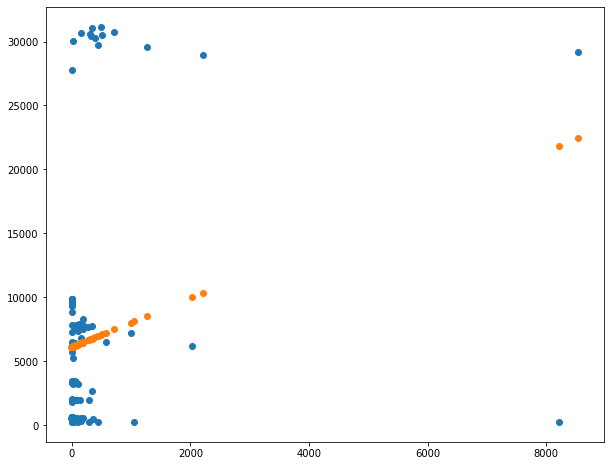

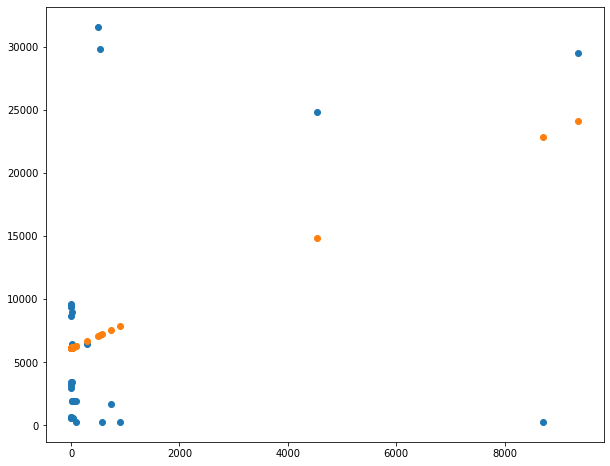

In [37]:
plt.figure(figsize =(10,8))
plt.scatter(x_train,y_train)
plt.scatter(x_train,reg.predict(x_train))

plt.figure(figsize =(10,8))
plt.scatter(x_test,y_test)
plt.scatter(x_test,reg.predict(x_test))

plt.show()

# Linear Models for Industries

In [38]:
covid_agr.head()

,Cases ACT,Cases NSW,Cases NT,Cases QLD,Cases SA,Cases TAS,Cases VIC,Cases WA,Cases Total
2020-02-01,0,4,0,2,0,0,3,0,9
2020-03-01,0,0,0,7,3,0,4,2,16
2020-04-01,80,2028,17,734,334,69,910,362,4534
2020-05-01,26,993,11,290,101,152,447,187,2207
2020-06-01,1,73,1,25,2,7,289,38,436


In [39]:
industry_nominal = industry_nominal_adjusted[industry_nominal_adjusted.index > datetime(2020,1,1)]
industry_nominal.head()

,Food retailing,Household goods retailing,"Clothing, footwear and personal accessory retailing",Department stores,Other retailing,"Cafes, restaurants and takeaway food services",Total (Industry)
2020-02-01,11528.8,4646.5,2099.0,1587.2,3978.6,3935.6,27775.7
2020-03-01,14265.5,5028.1,1631.5,1449.2,4626.2,3032.8,30033.3
2020-04-01,11821.1,5068.6,750.4,1228.4,3989.3,1958.9,24816.7
2020-05-01,12652.7,5895.3,1736.2,1766.7,4333.7,2555.5,28940.1
2020-06-01,12761.8,5679.3,2098.0,1577.1,4337.5,3271.2,29724.9


In [40]:
industry_result = pd.concat([industry_nominal, covid_agr], axis=1)
industry_result.head()

,Food retailing,Household goods retailing,"Clothing, footwear and personal accessory retailing",Department stores,Other retailing,"Cafes, restaurants and takeaway food services",Total (Industry),Cases ACT,Cases NSW,Cases NT,Cases QLD,Cases SA,Cases TAS,Cases VIC,Cases WA,Cases Total
2020-02-01,11528.8,4646.5,2099.0,1587.2,3978.6,3935.6,27775.7,0,4,0,2,0,0,3,0,9
2020-03-01,14265.5,5028.1,1631.5,1449.2,4626.2,3032.8,30033.3,0,0,0,7,3,0,4,2,16
2020-04-01,11821.1,5068.6,750.4,1228.4,3989.3,1958.9,24816.7,80,2028,17,734,334,69,910,362,4534
2020-05-01,12652.7,5895.3,1736.2,1766.7,4333.7,2555.5,28940.1,26,993,11,290,101,152,447,187,2207
2020-06-01,12761.8,5679.3,2098.0,1577.1,4337.5,3271.2,29724.9,1,73,1,25,2,7,289,38,436


In [41]:
industry_cols = ["Food retailing","Household goods retailing","Clothing, footwear and personal accessory retailing","Department stores","Other retailing","Cafes, restaurants and takeaway food services"]

In [42]:
LinearRegressionModel(industry_result, 'Cases ACT', industry_cols)
LinearRegressionModel(industry_result, 'Cases NSW', industry_cols)
LinearRegressionModel(industry_result, 'Cases WA', industry_cols)
LinearRegressionModel(industry_result, 'Cases SA', industry_cols)
LinearRegressionModel(industry_result, 'Cases NT', industry_cols)
LinearRegressionModel(industry_result, 'Cases VIC', industry_cols)
LinearRegressionModel(industry_result, 'Cases TAS', industry_cols)

**Linear Regression Evaluation for Cases ACT**

Train

MSE: 6.059
R Squared: 0.986 



Test

MSE: 157.478
R Squared: -36.054 



**Linear Regression Evaluation for Cases NSW**

Train

MSE: 15950.917
R Squared: 0.942 



Test

MSE: 76673.041
R Squared: -16.838 



**Linear Regression Evaluation for Cases WA**

Train

MSE: 382.232
R Squared: 0.957 



Test

MSE: 4956.161
R Squared: -4.829 



**Linear Regression Evaluation for Cases SA**

Train

MSE: 347.21
R Squared: 0.952 



Test

MSE: 2618.843
R Squared: -32.361 



**Linear Regression Evaluation for Cases NT**

Train

MSE: 89.855
R Squared: 0.618 



Test

MSE: 700.977
R Squared: -61.657 



**Linear Regression Evaluation for Cases VIC**

Train

MSE: 4643703.168
R Squared: 0.44 



Test

MSE: 1023146.034
R Squared: -312.158 



**Linear Regression Evaluation for Cases TAS**

Train

MSE: 146.264
R Squared: 0.915 



Test

MSE: 1846.824
R Squared: 0.0 



In [43]:
def scatterplot_indus(state):
    plt.figure(figsize=(6, 4))
    plt.scatter(industry_result[state], industry_result['Food retailing'], label = 'Food retailing')
    plt.scatter(industry_result[state], industry_result['Household goods retailing'], label ="Household goods retailing")
    plt.scatter(industry_result[state], industry_result['Clothing, footwear and personal accessory retailing'], label ="Clothing, footwear...")
    plt.scatter(industry_result[state], industry_result['Department stores'], label ="Department stores")
    plt.scatter(industry_result[state], industry_result['Other retailing'], label ="Other retailing")
    plt.scatter(industry_result[state], industry_result['Cafes, restaurants and takeaway food services'], label = "Cafes, restaurants...")
    plt.xlabel(state)
    plt.ylabel("Turnover")
    plt.grid(True)
    plt.title("Turnover vs " + state, fontsize=14)
    plt.show()

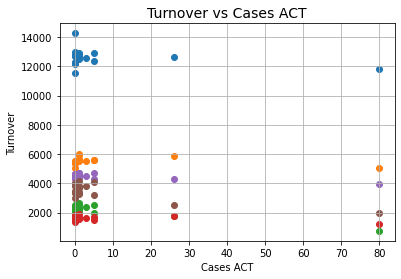

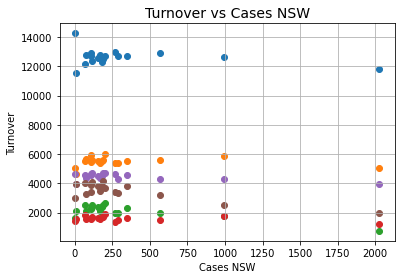

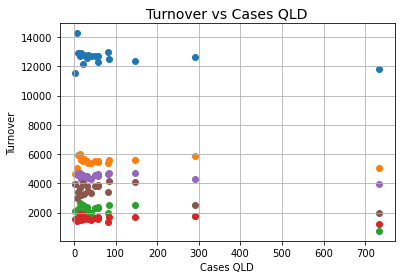

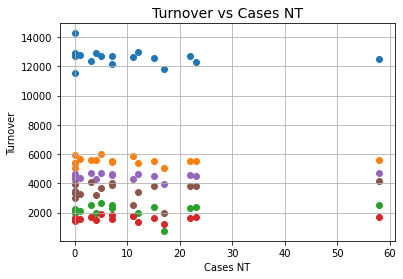

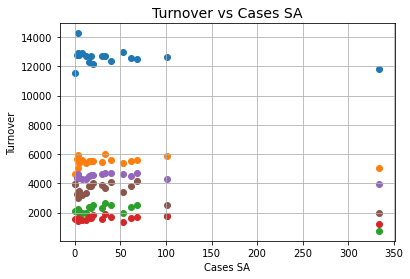

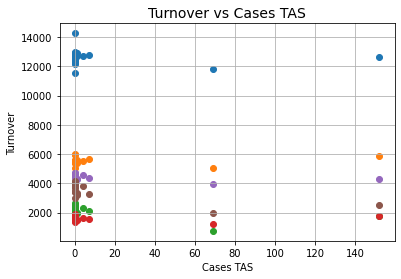

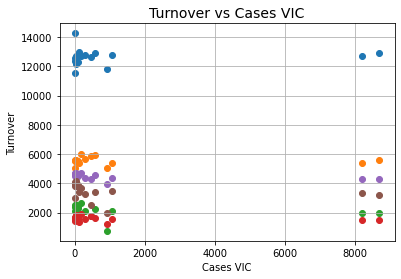

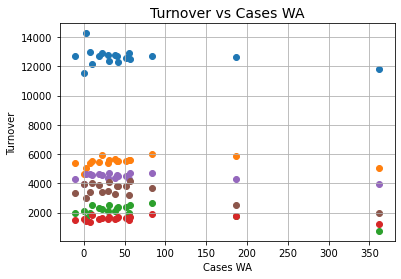

In [44]:
scatterplot_indus("Cases ACT")
scatterplot_indus("Cases NSW")
scatterplot_indus("Cases QLD")
scatterplot_indus("Cases NT")
scatterplot_indus("Cases SA")
scatterplot_indus("Cases TAS")
scatterplot_indus("Cases VIC")
scatterplot_indus("Cases WA")

In [45]:
industry_result = industry_result.dropna(axis=0)
industry_result.head()

,Food retailing,Household goods retailing,"Clothing, footwear and personal accessory retailing",Department stores,Other retailing,"Cafes, restaurants and takeaway food services",Total (Industry),Cases ACT,Cases NSW,Cases NT,Cases QLD,Cases SA,Cases TAS,Cases VIC,Cases WA,Cases Total
2020-02-01,11528.8,4646.5,2099.0,1587.2,3978.6,3935.6,27775.7,0,4,0,2,0,0,3,0,9
2020-03-01,14265.5,5028.1,1631.5,1449.2,4626.2,3032.8,30033.3,0,0,0,7,3,0,4,2,16
2020-04-01,11821.1,5068.6,750.4,1228.4,3989.3,1958.9,24816.7,80,2028,17,734,334,69,910,362,4534
2020-05-01,12652.7,5895.3,1736.2,1766.7,4333.7,2555.5,28940.1,26,993,11,290,101,152,447,187,2207
2020-06-01,12761.8,5679.3,2098.0,1577.1,4337.5,3271.2,29724.9,1,73,1,25,2,7,289,38,436


In [46]:
train, test = train_test_split(industry_result, test_size=0.2, random_state=142)

feature_cols = ['Clothing, footwear and personal accessory retailing','Department stores', 'Cafes, restaurants and takeaway food services']

x_train = train[feature_cols]
y_train = train['Cases ACT']
x_test = test[feature_cols]
y_test = test['Cases ACT']

reg = linear_model.LinearRegression()
reg.fit(x_train,y_train)

train_pred = reg.predict(x_train)
mse = ((np.array(y_train)-train_pred)**2).sum()/len(y_train)
r2 = r2_score(y_train, train_pred)
printmd("**Train**")
printmd("MSE: "+ str(round(mse, 3)))
printmd("R Squared: "+ str(round(r2, 3)))
print()
test_pred = reg.predict(x_test)
mse = ((np.array(y_test)-test_pred)**2).sum()/len(y_test)
r2 = r2_score(y_test, test_pred)
printmd("**Test**")
printmd("MSE: "+ str(round(mse, 3)))
printmd("R Squared: "+ str(round(r2, 3)))

**Train**

MSE: 109.479

R Squared: 0.75

**Test**

MSE: 111.409

R Squared: -25.214

# Linear Regression Model by State

### With percantage change in state turnover and percentage change in new monthly covid cases

In [47]:
data_percentage_adjusted = state_percentage_adjusted
data_percentage_adjusted = data_percentage_adjusted[data_percentage_adjusted.index > datetime(2019,12,1)]
data_percentage_adjusted
covid_change_new = covid_cases_change_new.iloc[covid_cases_change_new.index < datetime(2021,8,1)]
temp = []
for col in covid_change_new.columns:
    temp.append(f"Cases {col}")
covid_change_new.columns = temp
result = pd.concat([data_percentage_adjusted, covid_change_new], axis=1)

result = result.iloc[4:]
result

,NSW,VIC,QLD,SA,WA,TAS,NT,ACT,Total,Cases ACT,Cases NSW,Cases NT,Cases QLD,Cases SA,Cases TAS,Cases VIC,Cases WA,Cases Total
2020-05-01,16.4,16.8,16.4,16.1,19.2,17.2,7.6,12.3,16.6,-0.675000,-0.510355,-0.352941,-0.604905,-0.697605,1.202899,-0.508791,-0.483425,-0.513233
2020-06-01,3.4,4.2,0.7,1.0,2.7,3.6,-4.2,3.7,2.7,-0.961538,-0.926485,-0.909091,-0.913793,-0.980198,-0.953947,-0.353468,-0.796791,-0.802447
2020-07-01,6.0,-1.9,5.3,3.2,3.9,4.5,2.8,6.0,3.4,0.000000,0.438356,-1.000000,-0.640000,0.500000,-1.000000,1.000000,-0.421053,0.646789
2020-08-01,-2.2,-12.5,-1.3,-1.2,-0.2,-0.7,2.3,0.2,-4.1,4.000000,4.428571,4.000000,0.888889,1.666667,1.000000,14.051903,1.500000,12.036212
2020-09-01,-1.0,-0.5,-1.3,-2.4,-1.4,-1.6,2.9,-1.6,-1.1,-1.000000,-0.491228,-1.000000,1.352941,0.500000,0.000000,-0.056667,-1.200000,-0.087714
2020-10-01,0.8,5.5,-0.2,0.3,0.6,-1.5,0.2,-0.2,1.5,0.000000,-0.434483,0.000000,-0.175000,-0.583333,-1.000000,-0.872670,-3.727273,-0.850451
2020-11-01,2.2,22.0,3.6,-0.6,0.6,2.5,2.2,1.3,6.7,1.000000,0.207317,5.000000,-0.545455,5.600000,0.000000,-0.844019,1.800000,-0.609240
2020-12-01,-4.0,-6.9,-1.3,0.0,-1.4,-3.4,0.8,-0.4,-3.5,2.000000,-0.207071,2.000000,1.000000,0.848485,0.000000,-1.006135,-0.380952,-0.364729
2021-01-01,0.5,0.9,-1.6,0.1,1.8,0.6,0.8,0.4,0.3,-0.666667,1.203822,0.466667,0.700000,-0.704918,4.000000,-32.000000,-0.230769,0.618297
2021-02-01,1.2,-3.0,1.1,0.2,-5.4,0.7,-2.8,0.3,-0.8,-1.000000,-0.473988,0.045455,0.117647,-0.111111,-1.000000,1.354839,0.050000,-0.233918


In [48]:
LinearRegressionModel(result, 'Cases ACT', state_cols)
LinearRegressionModel(result, 'Cases NSW', state_cols)
LinearRegressionModel(result, 'Cases WA', state_cols)
LinearRegressionModel(result, 'Cases SA', state_cols)
LinearRegressionModel(result, 'Cases NT', state_cols)
LinearRegressionModel(result, 'Cases VIC', state_cols)
LinearRegressionModel(result, 'Cases TAS', state_cols)

**Linear Regression Evaluation for Cases ACT**

Train

MSE: 1.238
R Squared: 0.671 



Test

MSE: 105.932
R Squared: -129.96 



**Linear Regression Evaluation for Cases NSW**

Train

MSE: 0.419
R Squared: 0.794 



Test

MSE: 11.135
R Squared: -56.049 



**Linear Regression Evaluation for Cases WA**

Train

MSE: 0.274
R Squared: 0.85 



Test

MSE: 40.99
R Squared: -78.818 



**Linear Regression Evaluation for Cases SA**

Train

MSE: 0.05
R Squared: 0.925 



Test

MSE: 19.573
R Squared: -2.075 



**Linear Regression Evaluation for Cases NT**

Train

MSE: 0.619
R Squared: 0.703 



Test

MSE: 164.294
R Squared: -1.755 



**Linear Regression Evaluation for Cases VIC**

Train

MSE: 24.506
R Squared: 0.754 



Test

MSE: 2172.403
R Squared: -76.373 



**Linear Regression Evaluation for Cases TAS**

Train

MSE: 0.083
R Squared: 0.951 



Test

MSE: 31.338
R Squared: -140.02 



In [49]:
LinearRegressionModel(result, 'ACT', case_cols)
LinearRegressionModel(result, 'NSW', case_cols)
LinearRegressionModel(result, 'WA', case_cols)
LinearRegressionModel(result, 'SA', case_cols)
LinearRegressionModel(result, 'NT', case_cols)
LinearRegressionModel(result, 'VIC', case_cols)
LinearRegressionModel(result, 'TAS', case_cols)

**Linear Regression Evaluation for ACT**

Train

MSE: 9.539
R Squared: 0.36 



Test

MSE: 109.808
R Squared: -649.177 



**Linear Regression Evaluation for NSW**

Train

MSE: 16.957
R Squared: 0.511 



Test

MSE: 1085.441
R Squared: -2229.358 



**Linear Regression Evaluation for WA**

Train

MSE: 14.954
R Squared: 0.495 



Test

MSE: 182.108
R Squared: -19.14 



**Linear Regression Evaluation for SA**

Train

MSE: 11.332
R Squared: 0.504 



Test

MSE: 187.486
R Squared: -1720.811 



**Linear Regression Evaluation for NT**

Train

MSE: 3.713
R Squared: 0.504 



Test

MSE: 90.663
R Squared: -17.553 



**Linear Regression Evaluation for VIC**

Train

MSE: 18.401
R Squared: 0.61 



Test

MSE: 2505.65
R Squared: -18.545 



**Linear Regression Evaluation for TAS**

Train

MSE: 15.662
R Squared: 0.412 



Test

MSE: 291.631
R Squared: -536.844 



In [50]:
states = ['ACT', 'NSW', 'NT', 'QLD', 'SA', 'TAS', 'VIC', 'WA']
for st, cs in zip(states,case_cols):
    printmd('**'+st+'**')
    state_stat = stats.linregress(result[st], result[cs])
    print(state_stat,'\n')

**ACT**

LinregressResult(slope=-0.06590263801051956, intercept=0.5042754408974011, rvalue=-0.12681342729247663, pvalue=0.6524486272994869, stderr=0.14297016361715512, intercept_stderr=0.5532902231422177) 



**NSW**

LinregressResult(slope=-0.07968195996551475, intercept=0.41160322910502867, rvalue=-0.32502536512039276, pvalue=0.2371866998896324, stderr=0.06430235806048591, intercept_stderr=0.34565732425887746) 



**NT**

LinregressResult(slope=0.012088120816549492, intercept=-0.20829280142102582, rvalue=0.024533633205543817, pvalue=0.9308406573535336, stderr=0.1366137798861308, intercept_stderr=0.39229807130864724) 



**QLD**

LinregressResult(slope=-0.008422617263137805, intercept=0.558180288498656, rvalue=-0.024215146359340196, pvalue=0.9317365171625696, stderr=0.09644082679320358, intercept_stderr=0.4481472847328293) 



**SA**

LinregressResult(slope=-0.15264147536519537, intercept=1.8161670197675162, rvalue=-0.13740509321205727, pvalue=0.6253181792869207, stderr=0.3051821139176053, intercept_stderr=1.3451805386988083) 



**TAS**

LinregressResult(slope=-0.009585238067918197, intercept=-0.5046401156331827, rvalue=-0.004667493839363146, pvalue=0.9868285221000421, stderr=0.5695642783672569, intercept_stderr=2.8171273349611714) 



**VIC**

LinregressResult(slope=0.00273544724134551, intercept=0.14517040062029782, rvalue=0.018613465936534408, pvalue=0.9475048071671911, stderr=0.040752492093987264, intercept_stderr=0.343381765549048) 



In [51]:
result_ = result.dropna(axis=0)
cols = result_.columns

numbs = result_[result_.columns[0:9]]
numbs_cols = numbs.columns
numbs = pd.concat([numbs[col] for col in numbs_cols])

cases = result_[result_.columns[9:18]]
cases_cols = cases.columns
[cases[col] for col in cases_cols]
cases = pd.DataFrame(pd.concat([cases[col] for col in cases_cols]))

x_train, x_test = train_test_split(cases, test_size=0.2, random_state=152)
y_train, y_test = train_test_split(numbs, test_size=0.2, random_state=152)

reg = linear_model.LinearRegression()
reg.fit(x_train,y_train)

train_pred = reg.predict(x_train)
mse = ((np.array(y_train)-train_pred)**2).sum()/len(y_train)
r2 = r2_score(y_train, train_pred)
printmd("**Train**")
printmd("MSE: "+ str(round(mse, 3)))
printmd("R Squared: "+ str(round(r2, 3)))
print()
test_pred = reg.predict(x_test)
mse = ((np.array(y_test)-test_pred)**2).sum()/len(y_test)
r2 = r2_score(y_test, test_pred)
printmd("**Test**")
printmd("MSE: "+ str(round(mse, 3)))
printmd("R Squared: "+ str(round(r2, 3)))

**Train**

MSE: 21.493

R Squared: 0.006

**Test**

MSE: 40.098

R Squared: -0.005

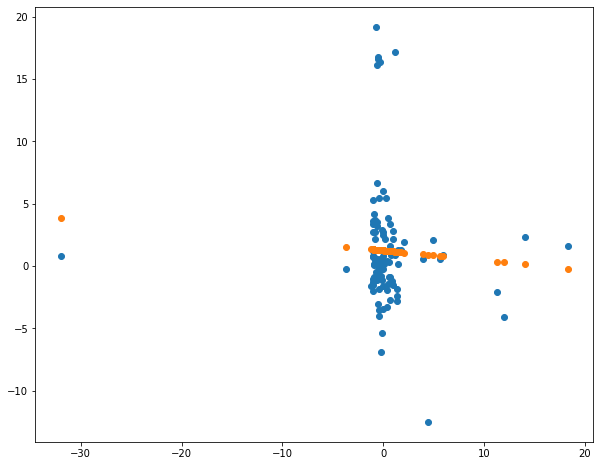

In [52]:
plt.figure(figsize =(10,8))
plt.scatter(x_train,y_train)
plt.scatter(x_train,reg.predict(x_train))
plt.show()

In [53]:
lr = stats.linregress(cases[0], numbs)
lr.pvalue

0.3417360649313098

## Conclusion

H0 the null-hypothis for the models generated above would be that there is no relationship between percentage change in cases and percentage change in turnover.

Based on the models seen above, the data used to train these models and the p-value calculated from these linear regression models. We cannot reject the null-hypothis with the data we have evailable to us at this moment.

We believe the reason for this is due to the fact that the turnover data being presented on a monthly basis this made it so that covid data had to be arranged in a monthly basis as well, lowering the number of usable datapoints for this analysis. And the transformation of the incremental change of the daily covid data into a monthly dataset has also made for an increase in the standard deviation of the data.

In [54]:
subgroup_cols = ['Supermarket and grocery stores',
 'Liquor retailing',
 'Other specialised food retailing',
 'Food retailing',
 'Furniture, floor coverings, houseware and textile goods retailing',
 'Electrical and electronic goods retailing',
 'Hardware, building and garden supplies retailing',
 'Household goods retailing',
 'Clothing retailing',
 'Footwear and other personal accessory retailing',
 'Clothing, footwear and personal accessory retailing',
 'Department stores',
 'Newspaper and book retailing',
 'Other recreational goods retailing',
 'Pharmaceutical, cosmetic and toiletry goods retailing',
 'Other retailing n.e.c.',
 'Other retailing',
 'Cafes, restaurants and catering services',
 'Takeaway food services',
 'Cafes, restaurants and takeaway food services',
 'Total (Industry)']
def retSubgroups(x:list):
    ret = []
    for i, s in enumerate(subgroup_cols):
        if i in x: ret.append(s)
    return ret

In [55]:
def nominalTopercent(dataset, mult = 1):
    ds = copy.copy(dataset)
    idx = ds.index
    ds = ds.T
    ds_temp = ds.copy()
    for i in range(1,len(idx)):
        ds[idx[i]] = (  (ds_temp[idx[i]]-ds_temp[idx[i-1]])/ ds_temp[idx[i-1]] ) * mult
    ds = ds.T.iloc[1:]
    return ds

nominalTopercent(eval(f'turnover_subgroup_{state}'), 100)

,Supermarket and grocery stores,Liquor retailing,Other specialised food retailing,Food retailing,"Furniture, floor coverings, houseware and textile goods retailing",Electrical and electronic goods retailing,"Hardware, building and garden supplies retailing",Household goods retailing,Clothing retailing,Footwear and other personal accessory retailing,...,Department stores,Newspaper and book retailing,Other recreational goods retailing,"Pharmaceutical, cosmetic and toiletry goods retailing",Other retailing n.e.c.,Other retailing,"Cafes, restaurants and catering services",Takeaway food services,"Cafes, restaurants and takeaway food services",Total (Industry)
NSW,,,,,,,,,,,,,,,,,,,,,
1982-05-01,0.097688,2.522936,0.153846,0.360837,-4.208999,-0.850662,-0.805153,-1.815878,0.314136,0.303030,...,1.244168,-1.296296,-2.145923,-0.890869,-1.951952,-1.588142,-2.627258,-1.148106,-1.756757,-0.411962
1982-06-01,0.487964,-0.671141,-0.614439,0.191755,1.212121,2.383222,2.922078,2.193548,0.208768,3.323263,...,-1.996928,-1.500938,2.192982,0.674157,2.297090,0.753093,1.180438,-0.696864,0.068776,0.337061
1982-07-01,0.129492,0.450450,1.391036,0.382775,-1.197605,-2.979516,3.470032,-0.799663,0.000000,1.461988,...,-6.008359,-4.190476,-4.291845,1.339286,-1.796407,-1.922050,-3.166667,-1.637427,-2.268041,-1.366621
1982-08-01,0.452635,0.672646,-1.829268,0.095329,-0.151515,0.287908,-1.829268,-0.339415,-1.666667,-1.729107,...,11.784325,3.379722,1.793722,1.101322,1.676829,1.905280,0.860585,0.118906,0.351617,1.741621
1982-09-01,-0.128742,-0.668151,1.086957,0.000000,-3.338392,1.244019,-3.105590,-1.277139,-3.072034,-2.346041,...,-5.420189,-0.961538,-1.762115,-0.435730,-2.698651,-1.495726,-2.730375,-0.118765,-1.121233,-1.673767
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-01,-1.278545,0.000000,1.097345,-0.966275,-1.120063,-1.553944,1.476829,-0.422845,-0.074482,3.692412,...,4.285213,-0.533808,-4.500000,2.790600,2.891493,1.837173,1.257686,-0.732797,0.392157,0.220164
2021-04-01,1.271738,2.039735,8.508403,1.918609,2.444356,3.938665,4.248913,3.612275,4.084675,-0.326691,...,-9.312900,19.320215,11.518325,-0.796081,1.893211,2.713319,3.325973,7.256032,5.031250,2.144989
2021-05-01,0.613052,-1.973001,-2.775089,0.064359,0.096993,-0.303732,-3.706675,-1.344262,1.260384,2.523763,...,3.491179,-4.197901,3.345070,1.275720,0.812890,1.033994,3.699746,-1.107940,1.569473,0.494045


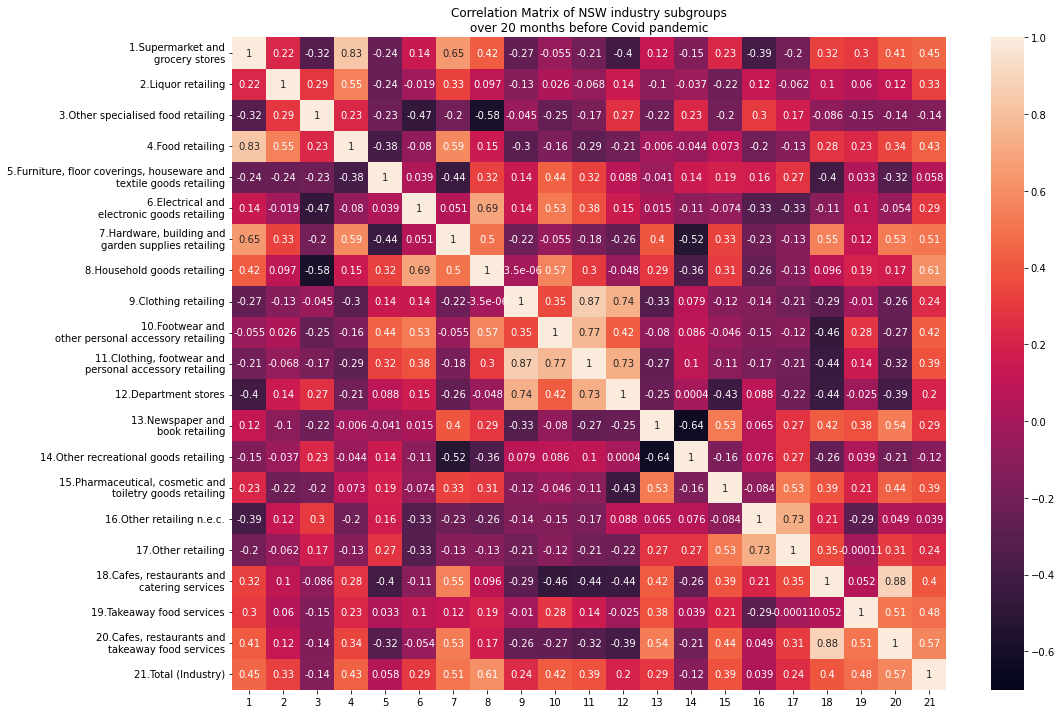

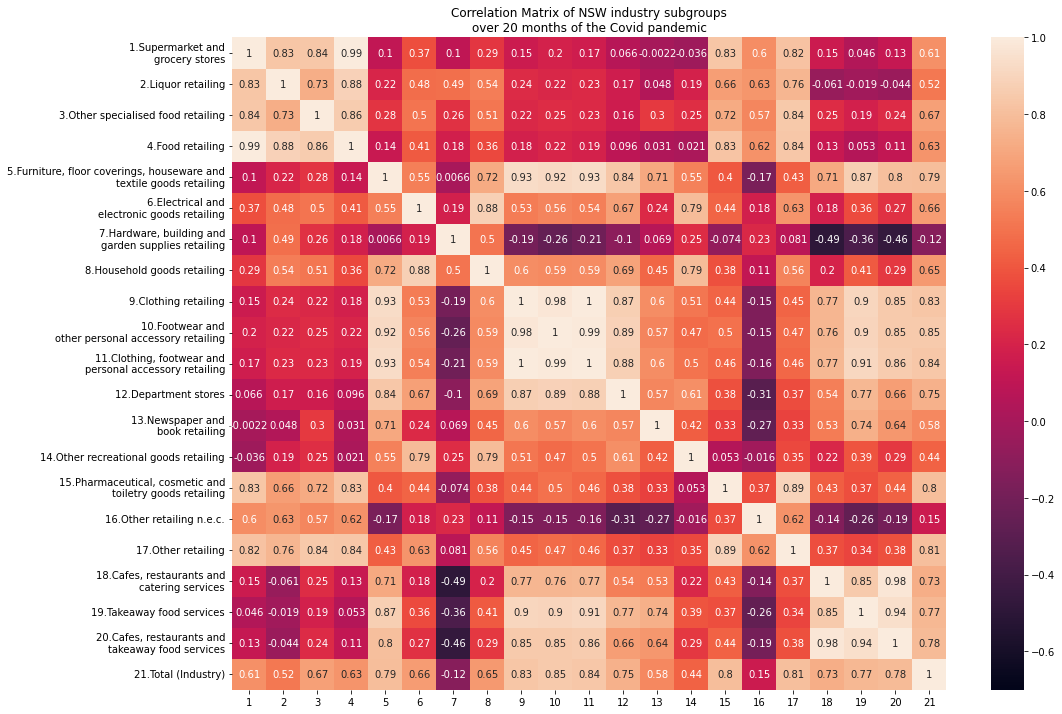

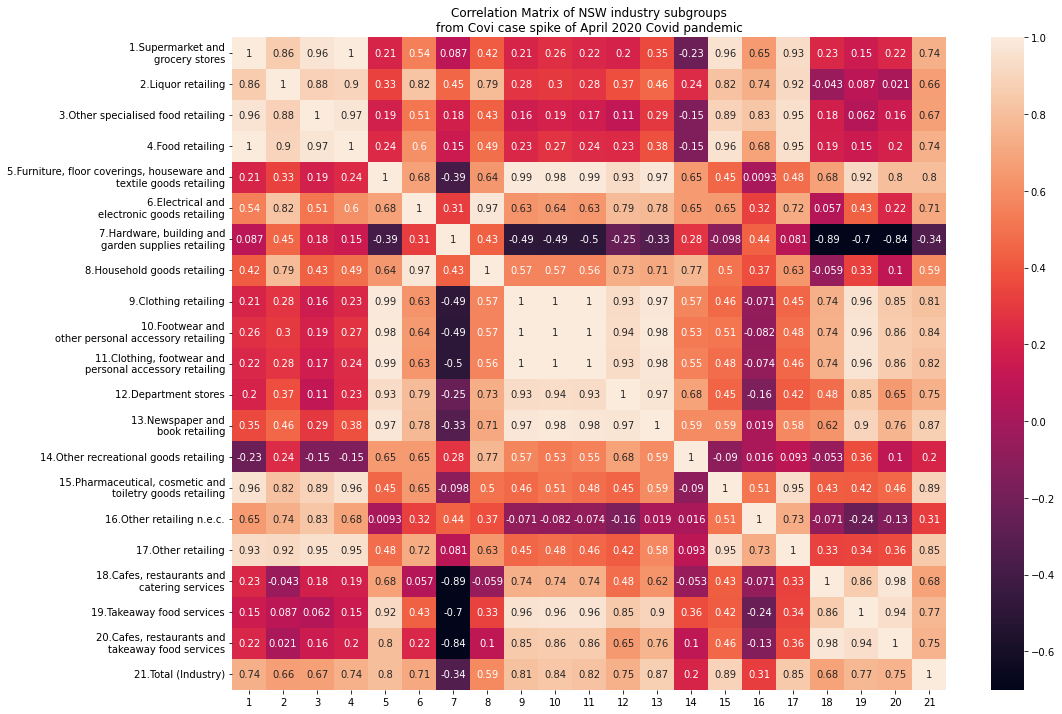

In [56]:
state = 'NSW'

ds = nominalTopercent(eval(f'turnover_subgroup_{state}'))

data1 , data2, data3= ds[-40:-20], ds[-20:], ds[-18:-13]

table1, table2 , table3= data1.T.to_numpy(), data2.T.to_numpy(), data3.T.to_numpy()
cols = list(ds.columns)
corr_matrix1 , corr_matrix2, corr_matrix3 = np.corrcoef(table1), np.corrcoef(table2),  np.corrcoef(table3)
for i in range(len(cols)):
    cols[i] = cols[i].replace('and ','and\n')
    cols[i]= f'{i+1}.' +cols[i] 

plt.figure(figsize=(16,12))
plt.title(f'Correlation Matrix of {state} industry subgroups\nover 20 months before Covid pandemic')
sns.heatmap(corr_matrix1, xticklabels = range(1,len(cols)+1), yticklabels = cols, annot=True, vmin=-0.7, vmax=1)
plt.xticks(rotation=0)

plt.figure(figsize=(16,12))
plt.title(f'Correlation Matrix of {state} industry subgroups\nover 20 months of the Covid pandemic')
sns.heatmap(corr_matrix2, xticklabels = range(1,len(cols)+1), yticklabels = cols, annot=True, vmin=-0.7, vmax=1)

plt.figure(figsize=(16,12))
plt.title(f'Correlation Matrix of {state} industry subgroups\nfrom Covi case spike of April 2020 Covid pandemic')
sns.heatmap(corr_matrix3, xticklabels = range(1,len(cols)+1), yticklabels = cols, annot=True, vmin=-0.7, vmax=1)
plt.show()   

#### The graph above shows a correlation matrix of the different subgroups for the state of NSW befor and during the pandemic, some notable relationships that can be seen are:

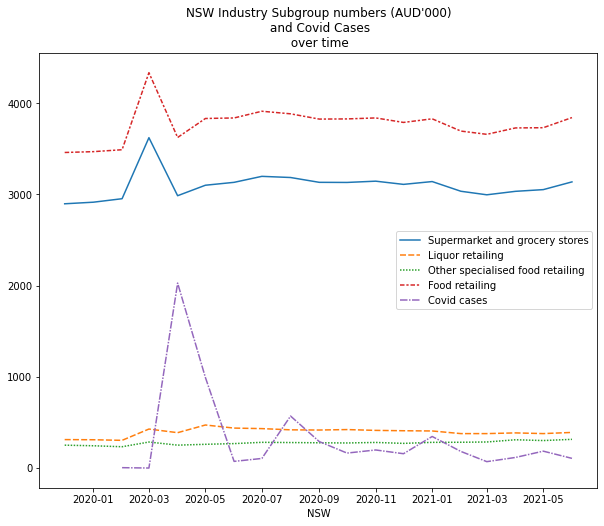

In [57]:
state = 'NSW'
subgroups = retSubgroups([0,1,2,3])

def plotSubgroups(state, subgroups, from_month, to_month, percent = False, covid = False):
    ds = eval(f'turnover_subgroup_{state}')
    
    ds = ds[subgroups]
    if covid:
        if percent:
            ds = nominalTopercent(ds)
            ds['Covid cases'] = covid_cases_change_new[state]
            title = f"{state} Industry Subgroup numbers (%)\n and Covid Cases (%)\n over time"
        else:
            ds['Covid cases'] = covid_cases_new[state]
            title = f"{state} Industry Subgroup numbers (AUD'000)\n and Covid Cases\n over time"
    else:
        if percent:
            ds = nominalTopercent(ds)
            title = f"{state} Industry Subgroup numbers (%)"
        else:
            title = f"{state} Industry Subgroup numbers (AUD'000)"
    ds = ds.iloc[from_month: to_month]

    plt.figure(figsize = (10,8))
    sns.lineplot(data= ds)
    plt.title(title)
    plt.show()
        
plotSubgroups('NSW',retSubgroups([0,1,2,3]),-20,-1,False, covid = True)

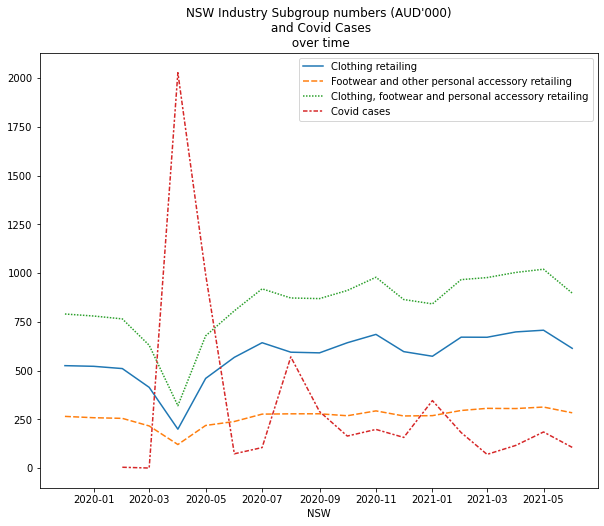

In [58]:
plotSubgroups('NSW',retSubgroups([8,9,10]),-20,-1, covid = True)

### This is a regression neural network which trys to determine the turnover by subgroup based on the states, the change in number of covid cases and the subgroup.

In [59]:
state = 'NSW'
covid = True
from_date, to_date = -20,-1
percent = True

def dataProcessing( from_month, to_month, reset_index = True ,percent = True, covid_pct = True,
                  y_is_states = False, y_is_subgroup = False, mult = 1, ret_here = False):
    states = ['ACT', 'NSW', 'NT', 'QLD', 'SA', 'TAS', 'VIC', 'WA']
    super_list = []
    for state in states:
        ds = eval(f'turnover_subgroup_{state}')
        ds = copy.copy(ds)
        cols = ds.columns[:-2]
        if percent:
            ds = nominalTopercent(ds,mult)
        else:
            pass
        if covid_pct:
            ds['covid_cases'] = covid_cases_change_new[state]
        else:
            ds['covid_cases'] = covid_cases_new[state]

        ds = ds.iloc[from_month: to_month]
        ds.fillna(0,inplace = True)
        covid_exists = []
        count = ds[ds.index > covid_cases_new.index[0]].shape[0]
        covid_exists+=[0]* (ds.shape[0]- count)
        covid_exists+=[1]* (count)
        for c in cols:
            temp = ds[[c,'covid_cases']]
            temp['covid_exists'] = covid_exists
            temp['state'] =  [state for i in range(temp.shape[0])]
            temp['subgroup']= [c for i in range(temp.shape[0])]
            temp_c = list(temp.columns)
            temp_c[0] = 'delta'
            temp.columns = temp_c
            super_list.append(temp)
    data = pd.concat(super_list)
    if ret_here:
        return data
    state_dp = list(copy.copy(data['state']))
    subgroup_dp = list(copy.copy(data['subgroup']))
    
    if y_is_states: data.drop(['state'], axis = 'columns', inplace = True)
    if y_is_subgroup: data.drop(['subgroup'], axis = 'columns', inplace = True)

    data = pd.get_dummies(data)
    if reset_index:
        data.reset_index(inplace = True)
        
    for d in data:
        data[d] = pd.to_numeric(data[d])
    data.drop(['index'], axis = 'columns', inplace = True)
    
    if y_is_states: data['state'] = state_dp
    if y_is_subgroup: data['subgroup'] = subgroup_dp
    return data

data = dataProcessing(-24,-1, percent = True, covid_pct = True)
data

,delta,covid_cases,covid_exists,state_ACT,state_NSW,state_NT,state_QLD,state_SA,state_TAS,state_VIC,...,subgroup_Household goods retailing,subgroup_Liquor retailing,subgroup_Newspaper and book retailing,subgroup_Other recreational goods retailing,subgroup_Other retailing,subgroup_Other retailing n.e.c.,subgroup_Other specialised food retailing,"subgroup_Pharmaceutical, cosmetic and toiletry goods retailing",subgroup_Supermarket and grocery stores,subgroup_Takeaway food services
0,0.013613,0.000000,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0.014979,0.000000,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0.001527,0.000000,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0.006098,0.000000,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0.019697,0.000000,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3415,-0.045195,0.050000,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3416,0.096048,-0.761905,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3417,-0.028512,2.100000,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3418,0.018990,0.806452,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


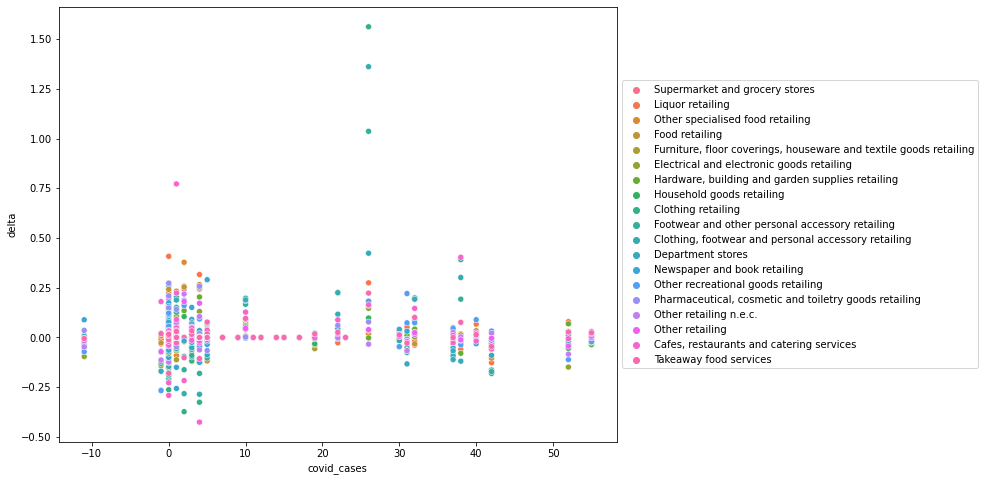

In [60]:
dt = dataProcessing(-24,-1, percent = True, covid_pct = False,ret_here = True)
dt = outlier_detect(dt, 'covid_cases').dropna()
plt.figure(figsize = (10,8))
sns.scatterplot(data = dt,y='delta',x='covid_cases', hue = 'subgroup')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [61]:
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.metrics import accuracy_score, confusion_matrix, r2_score, mean_squared_error

# Specify features and the target
X = data.drop(['delta'], axis = 'columns')
y = data['delta']


# Split the dataset into training data and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=13)

# Training the MLPClassifier with the default parameters (random_state=42)
nnreg = MLPRegressor(random_state=13, hidden_layer_sizes = [25,25,20,20],
                    solver = 'lbfgs', activation='tanh', max_iter = 200,
                    alpha = 10**-5)
nnreg.fit(X_train, y_train)

y_pred = nnreg.predict(X_test)
score = r2_score(y_pred, y_test)
printmd("**The r2 score is:** " + str(score))

mse_test = mean_squared_error(y_pred, y_test)
mse_train = mean_squared_error(nnreg.predict(X_train), y_train)

printmd("<ins>Testing</ins>")
printmd("**The mean squared error is:** " + str(round(mse_test, 5)))

printmd("<ins>Training</ins>")
printmd("**The mean squared error is:** " + str(round(mse_train, 5)))

stats.ttest_ind(y_test, y_pred)

**The r2 score is:** -1.4539903199308428

<ins>Testing</ins>

**The mean squared error is:** 0.01447

<ins>Training</ins>

**The mean squared error is:** 0.00836

Ttest_indResult(statistic=-1.1704398492303343, pvalue=0.24196005052764724)

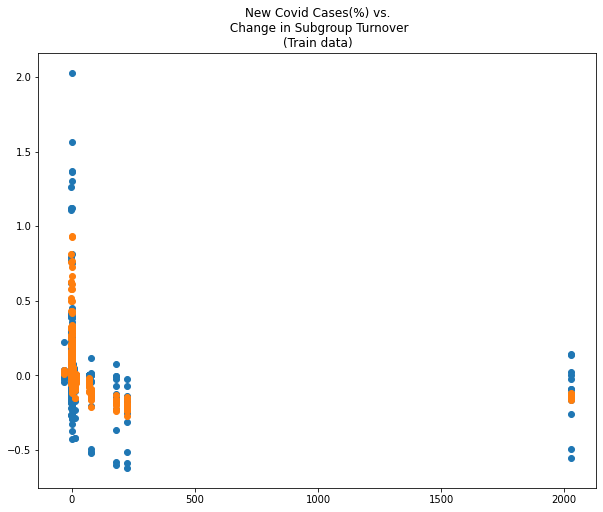

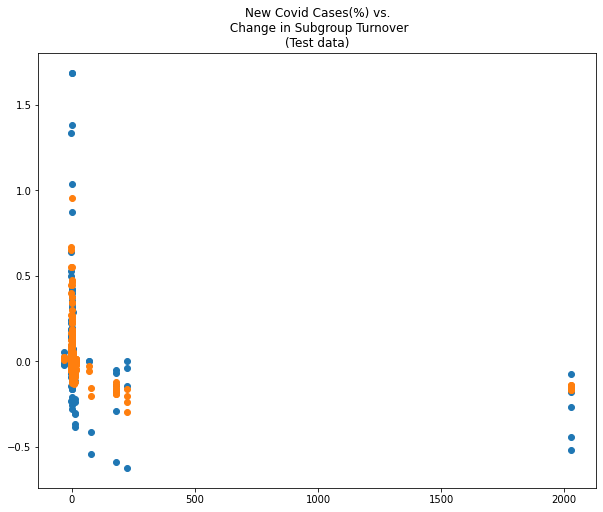

In [62]:
plt.figure(figsize = (10,8))
plt.scatter(X_train['covid_cases'],y_train)
plt.scatter(X_train['covid_cases'],nnreg.predict(X_train))
plt.title('New Covid Cases(%) vs.\n Change in Subgroup Turnover\n(Train data)')

plt.figure(figsize = (10,8))
plt.scatter(X_test['covid_cases'],y_test)
plt.scatter(X_test['covid_cases'],nnreg.predict(X_test))
plt.title('New Covid Cases(%) vs.\n Change in Subgroup Turnover\n(Test data)')

plt.show()

### This is a neural network classifer which classfies the state based on the change in turnover, the number of Covid cases and the subgroup

In [63]:
data = dataProcessing(-24,-1, y_is_states= True, covid_pct=False)
data

,delta,covid_cases,covid_exists,"subgroup_Cafes, restaurants and catering services",subgroup_Clothing retailing,"subgroup_Clothing, footwear and personal accessory retailing",subgroup_Department stores,subgroup_Electrical and electronic goods retailing,subgroup_Food retailing,subgroup_Footwear and other personal accessory retailing,...,subgroup_Liquor retailing,subgroup_Newspaper and book retailing,subgroup_Other recreational goods retailing,subgroup_Other retailing,subgroup_Other retailing n.e.c.,subgroup_Other specialised food retailing,"subgroup_Pharmaceutical, cosmetic and toiletry goods retailing",subgroup_Supermarket and grocery stores,subgroup_Takeaway food services,state
0,0.013613,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,ACT
1,0.014979,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,ACT
2,0.001527,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,ACT
3,0.006098,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,ACT
4,0.019697,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,ACT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3453,-0.045195,42.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,WA
3454,0.096048,10.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,WA
3455,-0.028512,31.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,WA
3456,0.018990,56.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,WA


In [64]:
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.metrics import accuracy_score, confusion_matrix, r2_score, mean_squared_error

# Specify features and the target
X = data.drop(['state'], axis = 'columns')
y = data['state']


# Split the dataset into training data and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=13)

# Training the MLPClassifier with the default parameters (random_state=42)
nnClass = MLPClassifier(random_state=13, hidden_layer_sizes = [100,50],
                    solver = 'lbfgs',max_iter = 300)

nnClass.fit(X_train, y_train)

# # Output the accuracy on training data and test data respectively
y_pred_train = nnClass.predict(X_train)
accuracy = accuracy_score(y_train, y_pred_train)
printmd('**Train Accuracy:** ' + str(round(accuracy, 5)))

y_pred_test = nnClass.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_test)
printmd('**Test Accuracy:** ' + str(round(accuracy, 5)))

**Train Accuracy:** 0.37397

**Test Accuracy:** 0.36898

In [65]:
with open('files\covid_lockdown_dates.txt') as f:
    lines = f.readlines()
vic_dates = lines[3:10]
nsw_dates = lines[13:21]
vic_dates = (':'.join(((''.join(vic_dates)).replace('Feb','February')).split('\n'))).split(':')
nsw_dates = (':'.join(((''.join(nsw_dates)).replace('Feb','February')).split('\n'))).split(':')
nsw_dates
vic_dates

['21 March 2020',
 ' Restrictions Commenced',
 '28 March 2020',
 ' Stage 3 Lockdown restrictions commence',
 '9 July 2020',
 ' Restrictions Flemington and North Melb tightened',
 '19 July 2020',
 ' Restrictions tightened even further ',
 '30 July 2020',
 ' Restrictions continued to tighten',
 '18 October 2020',
 ' Some restrictions eased',
 '21 November 2020',
 ' Restrictions eased again -> Return to relative normality',
 '']

In [66]:
nsw_dates_dict = {}
months = ['January','February','March','April','May','June','July','August','September','October', 'November', 'December']
for i in range(len(nsw_dates)-1):
    if i % 2==0:
        date = nsw_dates[i].split(" ")
        date = (datetime(int(date[2]),months.index(date[1])+1,int(date[0])  )  )
        nsw_dates_dict[nsw_dates[i+1].strip()] = date
nsw_dates_dict

{'Restrictions commenced': datetime.datetime(2020, 3, 16, 0, 0),
 'Restrictions eased, capacities increased and reasons to leave home increased': datetime.datetime(2020, 5, 15, 0, 0),
 'Restrictions eased, capacities increased further and reasons to leave home increased': datetime.datetime(2020, 6, 13, 0, 0),
 'Northern Beaches outbreak': datetime.datetime(2020, 12, 19, 0, 0),
 'Lockdown ends': datetime.datetime(2021, 2, 10, 0, 0),
 'Bondi Outbreak': datetime.datetime(2021, 6, 16, 0, 0),
 'Heavy restrictions on Northen Beaches LGA': datetime.datetime(2021, 6, 18, 0, 0),
 'Restrictions easing.': datetime.datetime(2021, 10, 11, 0, 0)}

In [67]:
vic_dates_dict = {}
months = ['January','February','March','April','May','June','July','August','September','October', 'November', 'December']
for i in range(len(vic_dates)-1):
    if i % 2==0:
        date = vic_dates[i].split(" ")
        date = (datetime(int(date[2]),months.index(date[1])+1,int(date[0])  )  )
        vic_dates_dict[vic_dates[i+1].strip()] = date
vic_dates_dict

{'Restrictions Commenced': datetime.datetime(2020, 3, 21, 0, 0),
 'Stage 3 Lockdown restrictions commence': datetime.datetime(2020, 3, 28, 0, 0),
 'Restrictions Flemington and North Melb tightened': datetime.datetime(2020, 7, 9, 0, 0),
 'Restrictions tightened even further': datetime.datetime(2020, 7, 19, 0, 0),
 'Restrictions continued to tighten': datetime.datetime(2020, 7, 30, 0, 0),
 'Some restrictions eased': datetime.datetime(2020, 10, 18, 0, 0),
 'Restrictions eased again -> Return to relative normality': datetime.datetime(2020, 11, 21, 0, 0)}

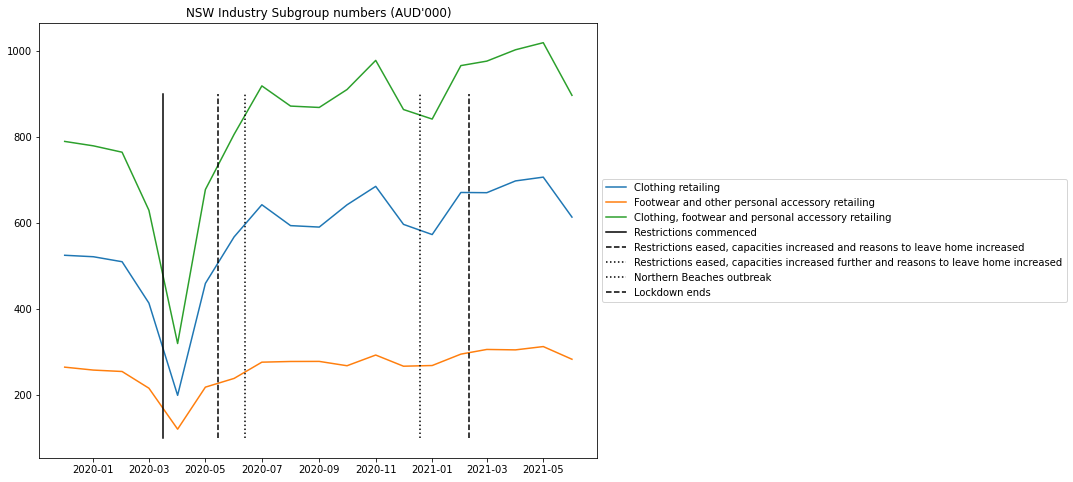

In [68]:
nsw_dates_dict
def outbreakPlot(state, subgroup:list ,dates_dict, line_height = 4000, show_covid = False):
    import matplotlib as mplt
    subgroups = retSubgroups(subgroup)
    from_month, to_month= -20,-1
    percent = False
    covid = False

    markers = ['>','<','v','o','3','x']
    styles = ['-','--',':','dotted','dashed','loosely dotted','dashdotted', 'denslydashdoted']

    ds = eval(f'turnover_subgroup_{state}')
    ds = ds[subgroups]
    if covid:
        if percent:
            ds = nominalTopercent(ds)
            ds['Covid cases'] = covid_cases_change_new[state]
            title = f"{state} Industry Subgroup numbers (%)\n and Covid Cases (%)\n over time"
        else:
            ds['Covid cases'] = covid_cases_new[state]
            title = f"{state} Industry Subgroup numbers (AUD'000)\n and Covid Cases\n over time"
    else:
        if percent:
            ds = nominalTopercent(ds)
            title = f"{state} Industry Subgroup numbers (%)"
        else:
            title = f"{state} Industry Subgroup numbers (AUD'000)"
    ds = ds.iloc[from_month: to_month]

    plt.figure(figsize = (10,8))
    # sns.lineplot(data= ds)
    range_ = np.arange(100,line_height,100)
    cases = covid_cases_new[covid_cases_new.index<ds.index[-1]]
    if show_covid:
        plt.plot(cases.index, cases[state],label = 'Covid Cases')
    for d in ds:
        plt.plot(ds.index, ds[d], label= d)

    for i,key in enumerate(list(dates_dict.keys())[:-3]):
        plt.plot([dates_dict[key]]*len(range_),range_, label = key,
                 linestyle=styles[i], color = 'black')
    plt.title(title)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()

# plotSubgroups('NSW',retSubgroups([0,1,2,3]),-20,-1,False, covid = True)
outbreakPlot('NSW', [8,9,10], nsw_dates_dict ,1000)


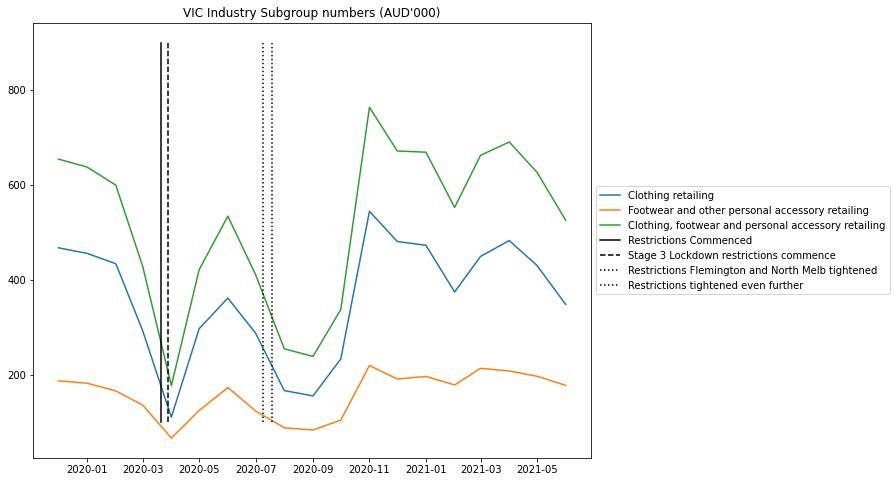

In [71]:
outbreakPlot('VIC', [8,9,10], vic_dates_dict ,1000)
plt.show()